In [12]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re # regular expression libary.
import nltk # Natural Language toolkit
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords


df = pd.read_csv (r'/Users/shunhuawei/Desktop/tripadvisor_hotel_reviews.csv')
print (df)

                                                  Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
5      love monaco staff husband stayed hotel crazy w...       5
6      cozy stay rainy city, husband spent 7 nights m...       5
7      excellent staff, housekeeping quality hotel ch...       4
8      hotel stayed hotel monaco cruise, rooms genero...       5
9      excellent stayed hotel monaco past w/e delight...       5
10     poor value stayed monaco seattle july, nice ho...       2
11     nice value seattle stayed 4 nights late 2007. ...       4
12     nice hotel good location hotel kimpton design ...       4
13     nice hotel not nice staff hotel lovely staff q...       3
14     great hotel night 

In [13]:
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [14]:
print('Total rows: {}'.format(len(df)))

Total rows: 20491


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
Review    20491 non-null object
Rating    20491 non-null int64
dtypes: int64(1), object(1)
memory usage: 320.2+ KB


In [17]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [36]:
#Visualize Rating Score Distribution
sns.set_style(style="darkgrid")
ax = sns.countplot(x='Rating', data=df)
plt.title('Distribution of Rating')

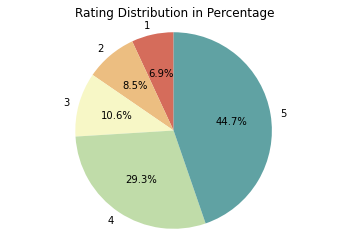

In [52]:
#1-5 Rating Distribution (Percentage)
labels= ['1', '2', '3', '4','5']

colors=['#D56C5B', '#ECBE81', '#F7F7C6', '#C0DCA9', '#60A2A3']

sizes= [1355, 1667, 2068, 5739, 8760]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.title("Rating Distribution in Percentage")

plt.show()

In [41]:
pip install pyldavis
pyLDAvis.gensim.prepare(model, corpus, dictionary)

NameError: name 'pyLDAvis' is not defined

In [42]:
pip install -U gensim

SyntaxError: invalid syntax (<ipython-input-42-f5f8ef1837f1>, line 1)

In [67]:
pip install -U pyLDAvis

Requirement already up-to-date: pyLDAvis in /opt/anaconda3/lib/python3.8/site-packages (2.1.2)
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Prepare the model
import re
import string

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'gensim'

In [13]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [ ]:
import nltk
nltk.download('stopwords') # run this one time

In [ ]:
df.dropna(axis = 0, how ='any',inplace=True) 


df['Review'] = df['Review'].apply(clean_text)
df['Num_words_text'] = df['Review'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(df['Rating'].value_counts())
print(len(df))
print('-------------------------')
max_review_data_sentence_length  = df['Num_words_text'].max()


print('No of Short reviews')

In [89]:
#pre-process

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['Review']=df['Review'].apply(remove_stopwords)

In [15]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import spacy

In [17]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [21]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [23]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [24]:
text_list=df['Review'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like couch desk clerk told mixed suites description kimpton website sorry free breakfast kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution send email trip guest survey follow email mail guess tell concerned guestthe staff ranged indifferent helpful asked desk good breakfast spots neighborhood hood told hotels best breakfast spots seattle block away convenient hotel does know exist arrived late night inside bellman busy chating cell phone help bagsprior arrival emailed hotel inform 20th anniversary hal

In [25]:
#Create vocabulary dictionary and document term matrix

In [26]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [ ]:
lda_model.print_topics()

In [ ]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

In [ ]:
#Level of Relevance
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)